In [1]:
import pandas as pd
import time
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
!pip install pyfim==6.28
from fim import apriori, eclat, fpgrowth

     |████████████████████████████████| 358kB 6.0MB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp37-cp37m-linux_x86_64.whl size=537714 sha256=2a426dd7beecb1b2ddaa038f4e43bf24a8e09ef4e840182331d02e6b59a08a9a
  Stored in directory: /root/.cache/pip/wheels/19/ac/b4/9ae8ceb2208d78b21b1157f8561cc4469d236b7d785e7422f1
Successfully built pyfim


Add functions for execute algorithms.

In [2]:
def call_apriori(data, min_sup, min_conf, min_len):
  start_time = time.time()
  result = apriori(data, supp = min_sup, conf = min_conf, report = 'с', zmin = min_len, target = 'r')
  fin_time = time.time() - start_time
  return result, fin_time

In [3]:
def call_eclat(data, min_sup, min_conf,min_len):
  start_time = time.time()
  result = eclat(data, supp = min_sup, conf = min_conf, report = 'с', zmin = min_len, target = 'r')
  fin_time = time.time() - start_time
  return result, fin_time

In [4]:
def call_fpgrowth(data, min_sup, min_conf, min_len):
  start_time = time.time()
  result = fpgrowth(data, supp = min_sup, conf = min_conf, report = 'с', zmin = min_len, target = 'r')
  fin_time = time.time() - start_time
  return result, fin_time

In [5]:
def call_algorithms(data, min_sup, min_conf, min_len = 1):
  apriori_result, apriori_time = call_apriori(data, min_sup, min_conf, min_len )
  eclat_result, eclat_time = call_eclat(data, min_sup, min_conf, min_len)
  fpgrowth_result, fpgrowth_time = call_fpgrowth(data, min_sup, min_conf, min_len)
  results = {'apriori': apriori_result, 'eclat': eclat_result,  'fpgrowth': fpgrowth_result,}
  times = {'apriori': apriori_time, 'eclat': eclat_time, 'fpgrowth': fpgrowth_time, }
  return results, times

In [13]:
def print_results(results):
  # for record in results:
  #       print('Set: ' + str(record[0]) + '\nSupport: ' + str(record[1]))
   for record in results:
        print('Rule: {' + str(' + '.join(record[1])) + '} -> ' + str(record[0]) + '\nConfidence: ' + str(record[2]))

In [7]:
def process_data(data, isNone=False):
  data = data.to_numpy()
  if(isNone):
    data_list = [a[a != np.array(None)] for a in data]
  else:
    data_list = [[i for i in a if i == i] for a in data]
  return data_list

In [8]:
basket_data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
airports_data = pd.read_csv('airports.dat', header=None)
basket_data_list = process_data(basket_data)
airports_data_list = process_data(airports_data)
retail_data = pd.read_csv('retail.dat', header=None, sep='\s\s+', engine='python', names=['items'])
retail_data = retail_data['items'].str.split(' ',expand=True)
retail_data_list =  process_data(retail_data, isNone=True)

In [35]:
result = fpgrowth(basket_data_list, target = 'r', supp = 8, zmin = 2, report = 'c', conf = 30)
print_results(result)

Rule: {spaghetti} -> mineral water
Confidence: 0.3430321592649311
Rule: {chocolate} -> mineral water
Confidence: 0.3213995117982099
Rule: {milk} -> mineral water
Confidence: 0.37037037037037035
Rule: {ground beef} -> mineral water
Confidence: 0.41655359565807326
Rule: {ground beef} -> spaghetti
Confidence: 0.3989145183175034
Rule: {frozen vegetables} -> mineral water
Confidence: 0.3748251748251748
Rule: {pancakes} -> mineral water
Confidence: 0.3548387096774194
Rule: {burgers} -> eggs
Confidence: 0.3302752293577982
Rule: {cake} -> mineral water
Confidence: 0.33881578947368424


In [ ]:
def draw_results(apriori_times, eclat_times, fpgrowth_times, amount_rules, max_num_rules, rules_less_then_7, confidents):
  fig, ax = plt.subplots(2, 2, sharex = True, figsize = (15, 10))

  ax[0, 0].plot(confidents, apriori_times)
  ax[0, 0].plot(confidents, eclat_times)
  ax[0, 0].plot(confidents, fpgrowth_times)
  ax[0, 0].legend(['Apriori', 'ECLAT', 'FP growth' ])
  ax[0, 0].set_title('Затраченное время')
  ax[0, 0].set(xlabel = 'Support, %', ylabel = 'Время, сек')

  ax[0, 1].plot(confidents, amount_rules)
  ax[0, 1].set_title('Общее количество найденных правил')
  ax[0, 1].set(xlabel = 'Support, %', ylabel = 'Правила')

  ax[1, 0].plot(confidents, max_num_rules)
  ax[1, 0].set_title('Максимальное количество объектов в правиле')
  ax[1, 0].set(xlabel = 'Support, %', ylabel = 'Объекты')

  ax[1, 1].plot(confidents, rules_less_then_7)
  ax[1, 1].set_title('Количество правил где менее семи объектов')
  ax[1, 1].set(xlabel = 'Support, %', ylabel = 'Объекты')

  plt.show()

In [ ]:
def test_data(data):
  min_sup = 0.3
  min_len = 2
  confidents = np.arange(70, 95, 5)
  apriori_times = []
  eclat_times = []
  fpgrowth_times = []
  amount_rules = []
  max_num_rules = []
  rules_less_then_7 = []
  for min_conf in confidents:
    results, times = call_algorithms(data, min_sup, min_conf, min_len)
    apriori_times.append(times['apriori'])
    fpgrowth_times.append(times['fpgrowth'])
    eclat_times.append(times['eclat'])
    if len(results['apriori']) == 0:
          amount_rules.append(0)
          max_num_rules.append(0)
          rules_less_then_7.append(0)
          continue
    amount_rules.append(len(results['apriori']))
    max_num_rules.append(max([(1 if type(i[0]) == str else len(i[0])) + len(i[1]) for i in results['apriori']]))
    rules_less_then_7.append(sum(x <= 7 for x in [(1 if type(i[0]) == str else len(i[0])) + len(i[1]) for i in results['apriori']]))
  draw_results(apriori_times, eclat_times, fpgrowth_times, amount_rules, max_num_rules, rules_less_then_7, confidents)

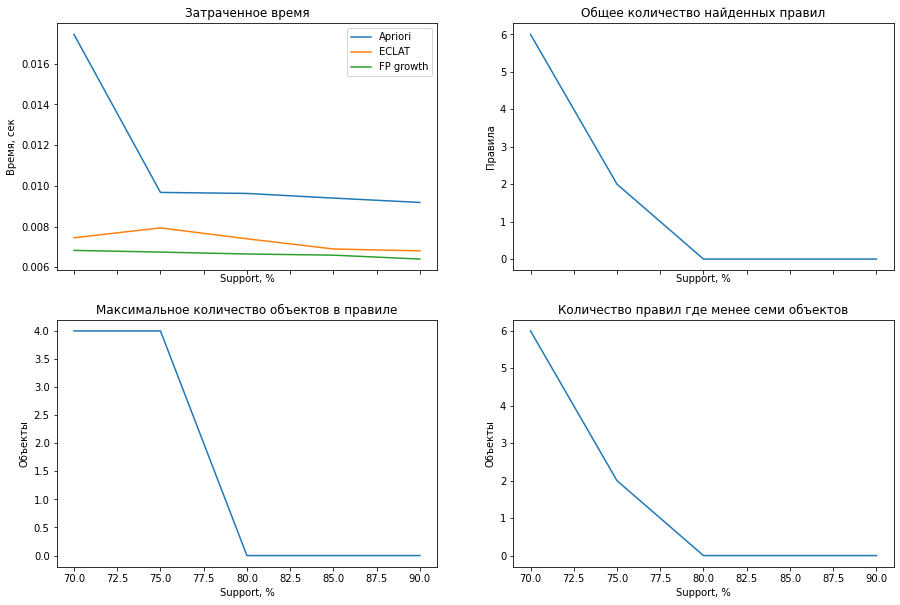

In [ ]:
test_data(basket_data_list) 

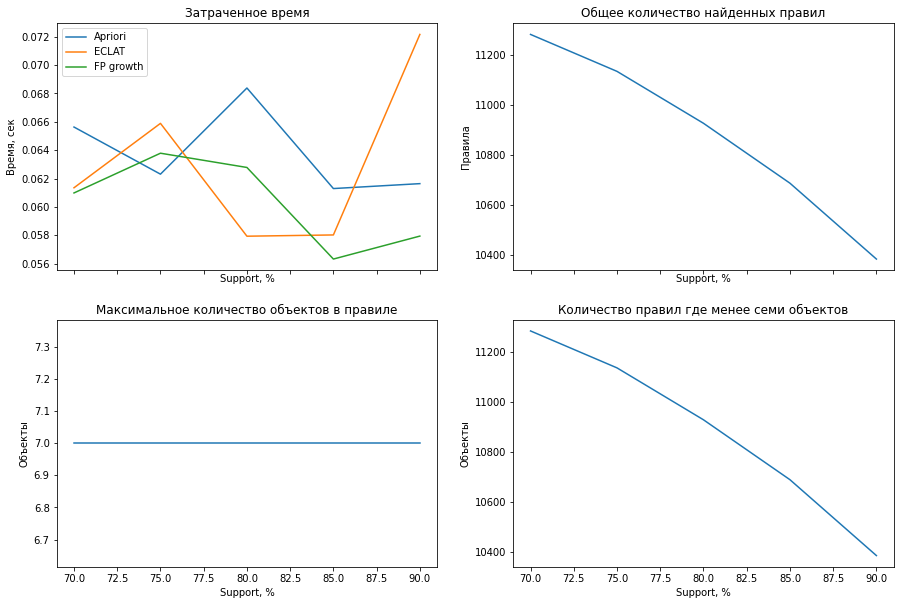

In [ ]:
test_data(airports_data_list) 

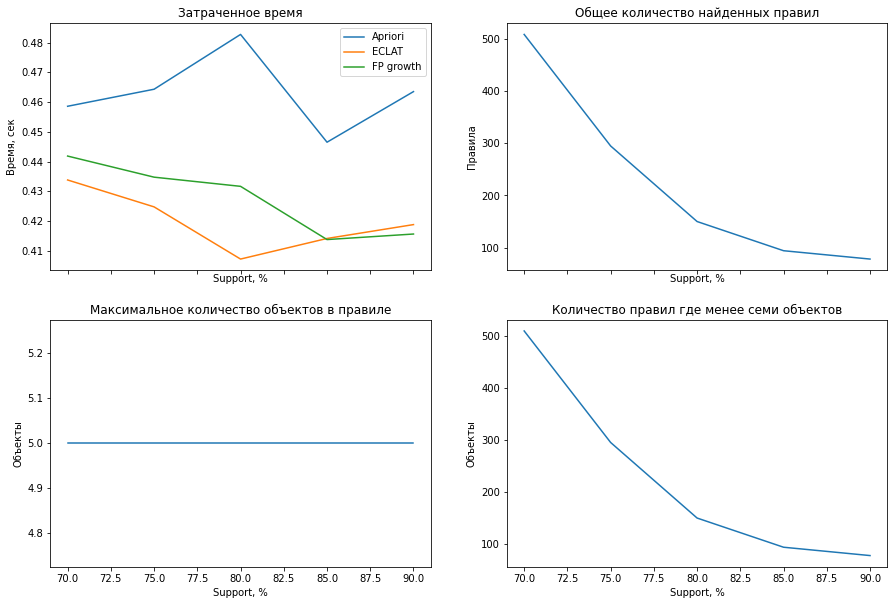

In [ ]:
test_data(retail_data_list)